#  Single Linear regression vs OLS 
#           &&& 
# Multiple Linear regression


### Single Linear regression

# Steps - 
1. analyse the dataset, clean it
2. train the model 
3. predict the model
4. check the performance of the model through various methods

### Q.)  Explain the concept of linear regression. What assumptions do we make when using linear regression?

Linear regression is a method to predict the likelyhood of an even to happen. In simple terms what are the probability/chance of an instance/event to occure. For instance, i am frequent user of Go Bus. Now lets say i want to predict arrival of my go bus in order to time my movement from my home to the bus stop. In order to make this prediction I can leverage my Linear regression technique which basically establishes a relationship between various factors that influences the arrival of bus on scheduled time. In the given scenario, my aim to predictic the deviation of time in arrival of the bus is called the dependent variable generally signified by y. The factors that influences the deviation in time are called independent variable generally denoted by X1, X2, X3 and so on. If there is only one factor that influences the dependent variable then such kind of Regression are called Simple Linear Regression. On the other hand, if there are mutiple factors that influences the dependent variable then such kind of regression are called Multiple Regression.

Now, progressing on our earlier example lets try to create a scenario to explain the Simple Linear Regression. So in my example i wanted to predict the deviation in minutes of Go Bus arrival from its scheduled time. Consider this is depended on only one factor, for instance the hour of the day in terms of Morning, Afternoon, Evening and Night. Based on the recent past data of Bus arrival the Bus we can develop the following prediction model:

1. Morning - In morning, since it is office hours the buses are usually punctual with a deviation of 2 minutes
2. Afternoon - In afternoon, the data suggest that the bus is usually late by 2-10 minutes.
3. Evening - In evening, since there are a lot returning traffic from office, the bus is late 30 minutes.
4. Night - In night, since the traffic is a lot less the buses are usually puntual with a deviation of 2 minutes.

Now consider i want to develop a model on the above descition.

&emsp; &emsp;&emsp; &emsp; &emsp; &emsp; <i>y = mx + c
    
y: in the above equation the dependent variable which basically points to how late the bus can be. <br>
m: is the coefficient of the independent variable <br>
x: is the input value - in our example when a passanger is wanting to travel (Morning, Afternoon, Evening, Night) <br>
c: is the constant variable - which suggest the minimal deviation in the bus arrival regardless of the dependent factor. 

Lets start by taking an example- Imagine you are running a little late,and you have to catch a Go Bus. And you want to see if you would be able to catch the bus or not. 
    First you will see what Time it is, as the buses are mostly on time in office hours ie., Morning & evenings. And you can predict accordingly.

Predicting or estimating the outcome of any certain situation/scenario/incidence by using the past data. The predicting outcome is called Dependent variable and the past data values used to predict the outcome that help me estimating are called Independent values. Now, this data can have single factor/features or multiple factors/features involved. If one kind of a feature help in estimation then it is called Single Linear regression and with multiple features involved in prediction it is called multiple regression. 

Now from the above example, predicting variable is if the bus is going to be on time or not, Using the dependent variable which is Time, or for multiple values using time, day of week.
<li> Y : Bus will come on time, X : Time, m : rate of change, C: is an element of constant in a scenario <br>


<b> Linear regression</b> is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. The most basic form of linear regression is  simple linear regression, which involves a single independent variable and is expressed as:            
    &emsp; &emsp;&emsp; &emsp; &emsp; &emsp; <i>y = mx + c

    
## Assumptions of Linear Regression -
<b>1. Linearity</b>: The relationship between the independent and dependent variables is linear.&emsp; &emsp;&emsp; &emsp; &emsp; <li>&emsp;&emsp;We can preapre a scatter plot the data points to see the relationship if it looks linear or not..<li>&emsp;&emsp; Also, residual plot can indicate if points are randomly scattered around the horizontal axis<br>
    
<b>2. Independence</b>: Observations are independent of each other. So the value of dependent variable of one observation should not inlfluence the other observation<br>
   <li>&emsp; &emsp;&emsp; This can be tested through Durbin-Watson Test- This test helps check for auto-correlation in residuals, and if the value is around 2 then it suggests no autocorrelation. You can use durbin_watson method & can be imported from statsmodels.stats.stattools
    
<b>3. Homoscedasticity</b>: The residuals (errors) must have constant variance at every level of the independent variable.
    <li>&emsp; &emsp;&emsp; Residual Plot can help
    <li>&emsp; &emsp;&emsp; You can also do a Breusch-Pagan Test- Its a test for heteroscedasticity <br>
        
<b>4. Normality</b>: The residuals of the model are normally distributed. This assumption is particularly important for constructing confidence intervals and hypothesis tests.
    <li>&emsp; &emsp;&emsp;Histogram: Plot a histogram of the residuals to see if they follow a normal distribution.
    <li>&emsp; &emsp;&emsp;Q-Q Plot: Plot the quantiles of residuals against the quantiles of a normal distribution.<br>
    
<b>5. No Multicollinearity</b>: In case of of multiple regression, Independent variables are not highly correlated with each other. Multicollinearity can make it difficult to determine the individual effect of each independent variable on the dependent variable
        <li>&emsp; &emsp;&emsp;Variance Inflation Factor / VIF : VIF for each predictor can be calculated, and if the value is above 10 then it indicates high multicolinearity

### Q.) How do you interpret the coefficients in a linear regression model?

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df=df.dropna()

In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


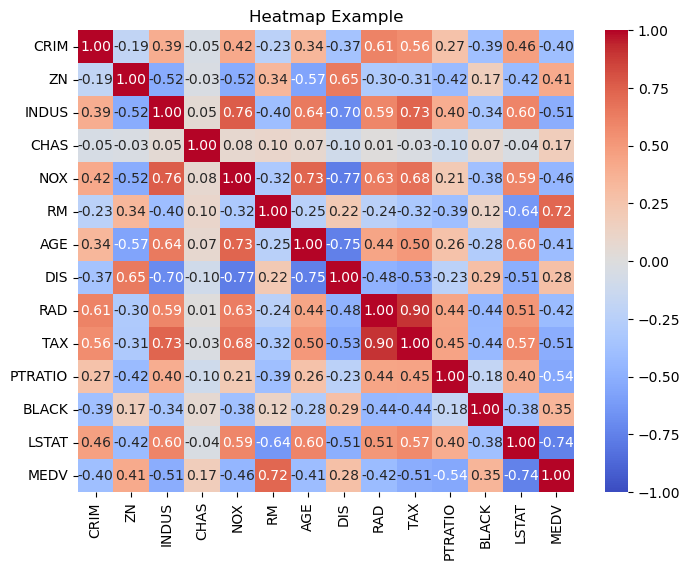

In [9]:
# Generate some data
# data = np.random.rand(10, 12)
# df = pd.DataFrame(data, columns=[f'Var{i+1}' for i in range(12)])
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Display the plot
plt.title('Heatmap Example')
plt.show()


In [10]:
indp = 'RM'

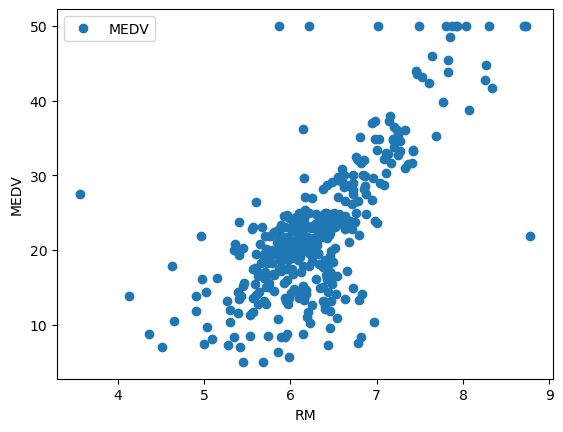

In [19]:
# RM vs MEDV (positive relation = 0.72)
df.plot(x='RM', y='MEDV', style='o')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

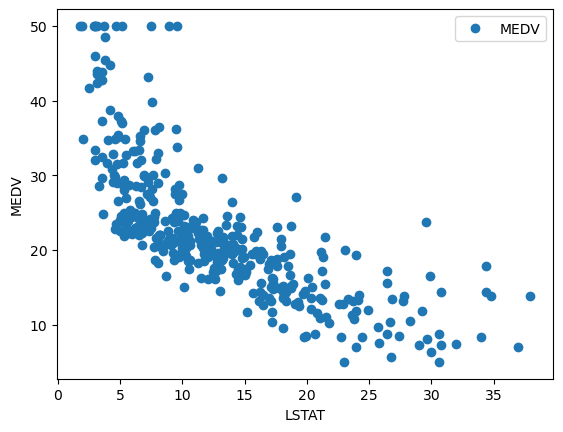

In [20]:
# LSTAT vs MEDV (negative relation in heatmap= -0.74)
df.plot(x='LSTAT', y='MEDV', style='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [25]:
df_ = df.loc[:, ['RM', 'MEDV']]
df_.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
5,6.430,28.7


In [101]:
# dividing the data into independent & dependent variable
x=pd.DataFrame(df_['RM'])
y=pd.DataFrame(df_['MEDV'])

In [102]:
# train & test 
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [103]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(315, 1)
(79, 1)
(315, 1)
(79, 1)


In [104]:
#Object creation
regressor = LinearRegression()

# training the model
regressor.fit(xtrain, ytrain)

LinearRegression()

In [105]:
y_pred=regressor.predict(xtest)
y_pred

array([[21.24950367],
       [24.93070854],
       [19.5371024 ],
       [14.88523156],
       [40.79102407],
       [40.44304948],
       [21.68905052],
       [24.09740097],
       [25.48014211],
       [17.87048726],
       [22.47657196],
       [18.54812198],
       [25.51677101],
       [37.36622152],
       [24.18897323],
       [23.69448302],
       [17.95290229],
       [23.35566566],
       [16.37785941],
       [24.70177789],
       [21.07551637],
       [18.41992082],
       [ 9.71139884],
       [22.8062321 ],
       [21.3319187 ],
       [15.4621368 ],
       [17.06465136],
       [13.13620139],
       [28.69432845],
       [19.50047349],
       [22.87948991],
       [17.98953119],
       [26.41417916],
       [16.73499122],
       [30.26937133],
       [19.30817175],
       [38.38267361],
       [17.44009763],
       [31.07520722],
       [21.05720192],
       [29.28954814],
       [20.35209552],
       [16.06651372],
       [20.93815798],
       [23.70364025],
       [36

In [ ]:
# Loss function
residual = ytest - y_pred
residual

In [ ]:
# residual plot - this also shows that the 1st assumption of linear regression is valid

plt.scatter(y_pred, residual)
plt.xlabel("predicted values")
plt.ylabel("residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
# I observe major values predicted lie between 15-25
# And the residuals lie form +5 to -5, for few other values are also between -5 to -10.
# the plot looks scattered

# Conclusion
# 1. So the model is following homoscedasticity a

In [ ]:
# Create histogram for Normality
plt.hist(residual, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# from the above histogram, 
# I can clearly see a bell curve-    in the residual plot, showing Normality in the model prediction

In [ ]:
# Since in the above residual plot, we see a random scattered points, it means that there is no bias.
# And the points are spread above & below 0, with no clear pattern, or a little curvature, or funnel like shape. 
# How a Residual Plot Should Ideally Look:

## The ideal residual plot should resemble a cloud of points scattered randomly around the zero line, with no clear patterns, curvature, or funnel-like shapes.

# The residuals should be evenly distributed above and below the zero line, indicating that the model is unbiased and equally likely to under-predict or over-predict the dependent variable.

# There should be no "fanning out" or "funneling" of residuals as you move along the x-axis (predicted values). Fanning out suggests heteroscedasticity, where the variance of residuals varies with the predicted values.

## Here are some common patterns in residual plots and what they may indicate:

# U-Shaped Pattern: This suggests that the model may be missing a relevant predictor variable, leading to a bias in predictions.

# Conical or Funnel Shape: This indicates heteroscedasticity, where the variance of residuals increases or decreases systematically with the predicted values. This violates the homoscedasticity assumption.

# Curved or Wavy Pattern: A curved pattern may suggest that a linear model is not appropriate for the data, and you might need to explore nonlinear regression models or transformations.

# Outliers or Clusters: Outliers or clusters of points away from the main cloud may indicate influential observations or data points that have a significant impact on the model fit.

In [ ]:
# Checking the normality of residuals
residuals = ytest - y_pred

stats.probplot(residuals.squeeze(), dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### Bringing everything together to analyse and understand in Excel

In [106]:
import statsmodels.api as sm

In [107]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,21.249504
1,24.930709
2,19.537102
3,14.885232
4,40.791024
...,...
74,20.187265
75,21.798937
76,19.665304
77,18.255091


In [108]:
# renaming the column name from 0(zero) to Predictd values
y_pred=y_pred.rename(columns = {0: 'Predicted Value'})
y_pred

,Predicted Value
0,21.249504
1,24.930709
2,19.537102
3,14.885232
4,40.791024
...,...
74,20.187265
75,21.798937
76,19.665304
77,18.255091


In [109]:
type(xtest)
xtest

,RM
96,6.163
289,6.565
456,5.976
143,5.468
267,8.297
...,...
27,6.047
379,6.223
17,5.990
106,5.836


In [110]:
ytest

,MEDV
96,21.4
289,24.8
456,12.7
143,15.6
267,50.0
...,...
27,14.8
379,10.2
17,17.5
106,19.5


In [111]:
xtest['Actual/MEDV'] = ytest
xtest

,RM,Actual/MEDV
96,6.163,21.4
289,6.565,24.8
456,5.976,12.7
143,5.468,15.6
267,8.297,50.0
...,...,...
27,6.047,14.8
379,6.223,10.2
17,5.990,17.5
106,5.836,19.5


In [112]:
xtest_index_reset = xtest.reset_index()

In [113]:
xtest_index_reset

,index,RM,Actual/MEDV
0,96,6.163,21.4
1,289,6.565,24.8
2,456,5.976,12.7
3,143,5.468,15.6
4,267,8.297,50.0
...,...,...,...
74,27,6.047,14.8
75,379,6.223,10.2
76,17,5.990,17.5
77,106,5.836,19.5


In [114]:
xtest_index_reset['Predicted'] = y_pred

In [115]:
xtest_index_reset

,index,RM,Actual/MEDV,Predicted
0,96,6.163,21.4,21.249504
1,289,6.565,24.8,24.930709
2,456,5.976,12.7,19.537102
3,143,5.468,15.6,14.885232
4,267,8.297,50.0,40.791024
...,...,...,...,...
74,27,6.047,14.8,20.187265
75,379,6.223,10.2,21.798937
76,17,5.990,17.5,19.665304
77,106,5.836,19.5,18.255091


In [116]:
# Model performance checks
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

In [117]:
mae=mean_absolute_error(ytest, y_pred)
mse=mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
R2=r2_score(ytest, y_pred)
# print(mae, mse, rmse, R2)

print(f"""Mean Absolute Error: {mae:.3f}
Mean Squared Error: {mse:.3f}
Root Mean Squared Error: {rmse:.3f}""")

print(f'R-squared Score: {R2:.3f}')
print(f'Coefficient: {regressor.coef_}')
print(f'Y-intercept: {regressor.intercept_}')

Mean Absolute Error: 4.005
Mean Squared Error: 30.676
Root Mean Squared Error: 5.539
R-squared Score: 0.656
Coefficient: [[9.15722605]]
Y-intercept: [-35.1864805]


In [118]:
print(regressor.coef_)
print(regressor.intercept_)

[[9.15722605]]
[-35.1864805]


In [ ]:
# Transfering it to CSV to analyse and build Understanding

xtest_index_reset.to_csv('ComparisionFile.csv', index=False)

# Converting details into excel sheet using Python

In [119]:
xtest_index_reset

,index,RM,Actual/MEDV,Predicted
0,96,6.163,21.4,21.249504
1,289,6.565,24.8,24.930709
2,456,5.976,12.7,19.537102
3,143,5.468,15.6,14.885232
4,267,8.297,50.0,40.791024
...,...,...,...,...
74,27,6.047,14.8,20.187265
75,379,6.223,10.2,21.798937
76,17,5.990,17.5,19.665304
77,106,5.836,19.5,18.255091


In [120]:
xtest_index_reset['Residual'] = xtest_index_reset['Actual/MEDV'] - xtest_index_reset['Predicted']

In [121]:
xtest_index_reset

,index,RM,Actual/MEDV,Predicted,Residual
0,96,6.163,21.4,21.249504,0.150496
1,289,6.565,24.8,24.930709,-0.130709
2,456,5.976,12.7,19.537102,-6.837102
3,143,5.468,15.6,14.885232,0.714768
4,267,8.297,50.0,40.791024,9.208976
...,...,...,...,...,...
74,27,6.047,14.8,20.187265,-5.387265
75,379,6.223,10.2,21.798937,-11.598937
76,17,5.990,17.5,19.665304,-2.165304
77,106,5.836,19.5,18.255091,1.244909


In [122]:
# Rounding specific columns to 2 decimal places
xtest_index_reset['Predicted'] = xtest_index_reset['Predicted'].round(2)
xtest_index_reset['Residual'] = xtest_index_reset['Residual'].round(2)
xtest_index_reset['RM'] = xtest_index_reset['RM'].round(2)

# Display the updated DataFrame
print(xtest_index_reset)

    index    RM  Actual/MEDV  Predicted  Residual
0      96  6.16         21.4      21.25      0.15
1     289  6.56         24.8      24.93     -0.13
2     456  5.98         12.7      19.54     -6.84
3     143  5.47         15.6      14.89      0.71
4     267  8.30         50.0      40.79      9.21
..    ...   ...          ...        ...       ...
74     27  6.05         14.8      20.19     -5.39
75    379  6.22         10.2      21.80    -11.60
76     17  5.99         17.5      19.67     -2.17
77    106  5.84         19.5      18.26      1.24
78     71  5.96         21.7      19.40      2.30

[79 rows x 5 columns]


In [123]:
xtest_index_reset['Zero-category'] = np.where(xtest_index_reset['Residual']>0, "Greater than 0", "Less than 0")
xtest_index_reset

,index,RM,Actual/MEDV,Predicted,Residual,Zero-category
0,96,6.16,21.4,21.25,0.15,Greater than 0
1,289,6.56,24.8,24.93,-0.13,Less than 0
2,456,5.98,12.7,19.54,-6.84,Less than 0
3,143,5.47,15.6,14.89,0.71,Greater than 0
4,267,8.30,50.0,40.79,9.21,Greater than 0
...,...,...,...,...,...,...
74,27,6.05,14.8,20.19,-5.39,Less than 0
75,379,6.22,10.2,21.80,-11.60,Less than 0
76,17,5.99,17.5,19.67,-2.17,Less than 0
77,106,5.84,19.5,18.26,1.24,Greater than 0


In [126]:
# Count occurrences of each category in 'zero-category'
category_counts = xtest_index_reset['Zero-category'].value_counts()

# Display the counts
print(category_counts)

Zero-category
Greater than 0    43
Less than 0       36
Name: count, dtype: int64


In [124]:
xtest_index_reset['Absolute residual']= xtest_index_reset['Residual'].abs()
xtest_index_reset

,index,RM,Actual/MEDV,Predicted,Residual,Zero-category,Absolute residual
0,96,6.16,21.4,21.25,0.15,Greater than 0,0.15
1,289,6.56,24.8,24.93,-0.13,Less than 0,0.13
2,456,5.98,12.7,19.54,-6.84,Less than 0,6.84
3,143,5.47,15.6,14.89,0.71,Greater than 0,0.71
4,267,8.30,50.0,40.79,9.21,Greater than 0,9.21
...,...,...,...,...,...,...,...
74,27,6.05,14.8,20.19,-5.39,Less than 0,5.39
75,379,6.22,10.2,21.80,-11.60,Less than 0,11.60
76,17,5.99,17.5,19.67,-2.17,Less than 0,2.17
77,106,5.84,19.5,18.26,1.24,Greater than 0,1.24


In [140]:
# Using lambda function with apply to categorize the residuals
xtest_index_reset['Range'] = xtest_index_reset['Absolute residual'].apply(
    lambda x: ("Category 0-1" if 0 <= x < 1 else
               "Category 1-2" if 1 <= x < 2 else
               "Category 2-3" if 2 <= x < 3 else
               "Category 3-4" if 3 <= x < 4 else
               "Category 4-5" if 4 <= x < 5 else
               "Category 5-7" if 5 <= x < 7 else
               "Greater than 7")
)

# Display the updated DataFrame
print(xtest_index_reset)

    index    RM  Actual/MEDV  Predicted  Residual   Zero-category  \
0      96  6.16         21.4      21.25      0.15  Greater than 0   
1     289  6.56         24.8      24.93     -0.13     Less than 0   
2     456  5.98         12.7      19.54     -6.84     Less than 0   
3     143  5.47         15.6      14.89      0.71  Greater than 0   
4     267  8.30         50.0      40.79      9.21  Greater than 0   
..    ...   ...          ...        ...       ...             ...   
74     27  6.05         14.8      20.19     -5.39     Less than 0   
75    379  6.22         10.2      21.80    -11.60     Less than 0   
76     17  5.99         17.5      19.67     -2.17     Less than 0   
77    106  5.84         19.5      18.26      1.24  Greater than 0   
78     71  5.96         21.7      19.40      2.30  Greater than 0   

    Absolute residual           Range  
0                0.15    Category 0-1  
1                0.13    Category 0-1  
2                6.84    Category 5-7  
3          

In [141]:
xtest_index_reset.sort_values(by='Range').head(60)

,index,RM,Actual/MEDV,Predicted,Residual,Zero-category,Absolute residual,Range
0,96,6.16,21.4,21.25,0.15,Greater than 0,0.15,Category 0-1
42,149,5.60,15.4,16.07,-0.67,Less than 0,0.67,Category 0-1
29,309,5.97,20.3,19.50,0.80,Greater than 0,0.80,Category 0-1
48,248,6.43,24.5,23.72,0.78,Greater than 0,0.78,Category 0-1
26,331,5.71,17.1,17.06,0.04,Greater than 0,0.04,Category 0-1
50,77,6.14,20.8,21.04,-0.24,Less than 0,0.24,Category 0-1
23,329,6.33,22.6,22.81,-0.21,Less than 0,0.21,Category 0-1
53,502,6.12,20.6,20.86,-0.26,Less than 0,0.26,Category 0-1
55,222,6.88,27.5,27.81,-0.31,Less than 0,0.31,Category 0-1
57,21,5.96,19.6,19.44,0.16,Greater than 0,0.16,Category 0-1


In [142]:
xtest_index_reset.sort_values(by='Range').tail(20)

,index,RM,Actual/MEDV,Predicted,Residual,Zero-category,Absolute residual,Range
44,128,6.43,18.0,23.70,-5.70,Less than 0,5.70,Category 5-7
25,404,5.53,8.5,15.46,-6.96,Less than 0,6.96,Category 5-7
51,274,6.76,32.4,26.70,5.70,Greater than 0,5.70,Category 5-7
24,7,6.17,27.1,21.33,5.77,Greater than 0,5.77,Category 5-7
39,22,6.14,15.2,21.06,-5.86,Less than 0,5.86,Category 5-7
64,279,6.81,35.1,27.19,7.91,Greater than 0,7.91,Greater than 7
13,283,7.92,50.0,37.37,12.63,Greater than 0,12.63,Greater than 7
60,374,4.14,13.8,2.71,11.09,Greater than 0,11.09,Greater than 7
20,181,6.14,36.2,21.08,15.12,Greater than 0,15.12,Greater than 7
68,377,6.79,13.3,27.03,-13.73,Less than 0,13.73,Greater than 7


In [169]:
df_dummy = xtest_index_reset[xtest_index_reset['index']==200]
df_dummy

,index,RM,Actual/MEDV,Predicted,Residual,Zero-category,Absolute residual,Range
62,200,7.14,32.9,30.15,2.75,Greater than 0,2.75,Category 2-3


# Analysis:

### 1. Our model predicts values nearer or greater than the existing values in most of the cases, and we saw that with the count of greter than & less than 0, which in a way is a positive as it helps customers buying home will be on a positive side of buying the house.

### 2. Aproximately 80 percent of houses with values below 7000’s are being almost predicted correctly or with nearby values

### 3. As the number of room increases, the prediction is going out of range more often

### 4. In most cases, the cost is estimated/predicted higher when number of rooms increases

### 5. People do not want to pay for a property where the number of rooms are less than 4


# Linear regression with 2 independent variables 

In [182]:
# Selecting specific columns
selected_columns = df[['RM', 'LSTAT', 'MEDV']]
print(selected_columns)

        RM  LSTAT  MEDV
0    6.575   4.98  24.0
1    6.421   9.14  21.6
2    7.185   4.03  34.7
3    6.998   2.94  33.4
5    6.430   5.21  28.7
..     ...    ...   ...
499  5.569  15.10  17.5
500  6.027  14.33  16.8
502  6.120   9.08  20.6
503  6.976   5.64  23.9
504  6.794   6.48  22.0

[394 rows x 3 columns]


In [183]:
# Features and target
x_2 = selected_columns[['RM', 'LSTAT']]  # Features
y_2 = selected_columns['MEDV']           # Target

In [184]:
# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x_2, y_2, test_size=0.2, random_state=1)

In [185]:
# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x2_train, y2_train)

LinearRegression()

In [186]:
y2_predict = model.predict(x2_test)
y2_predict

array([22.56966926, 25.79312846, 16.54952254,  9.09658487, 35.82638857,
       38.22198776, 26.21077718, 23.50825901, 27.98927985, 18.89465643,
       19.30827185, 22.00279859, 16.99056802, 36.79374657, 19.30856765,
       27.9688693 , 18.58165232, 27.7971098 ,  7.58461203, 26.23827766,
       23.7276901 , 20.82561615,  4.36854326, 26.07167363, 17.43680654,
        8.77515735, 19.56178627,  5.23100779, 30.41406983, 22.52285223,
       19.18354537, 17.68011333, 29.40098413, 15.95416537, 32.65315522,
       17.14715695, 37.53443798, 14.80109339, 30.85896078, 17.57187211,
       31.33578461, 25.93815752, 13.0366579 , 19.89359044, 21.22474181,
       36.012774  , 17.19053232, 28.47685126, 25.1264306 , 20.10856096,
       23.16404511, 30.72284347, 27.11863606, 23.85298002, 15.72082206,
       27.08483915,  7.42696667, 19.928749  , 15.15305457, 16.88291843,
       -5.21151051, 26.34781948, 31.99809705, 24.37285054, 30.1177388 ,
       28.50623927,  0.75041892, 22.82724982, 19.16150084, 16.54

In [187]:
y2_predict = pd.DataFrame(y2_predict)
y2_predict

,0
0,22.569669
1,25.793128
2,16.549523
3,9.096585
4,35.826389
...,...
74,18.051513
75,15.948198
76,19.496859
77,16.081493


In [188]:
y2_predict = y2_predict.rename(columns = {0: 'Predicted'})
y2_predict

,Predicted
0,22.569669
1,25.793128
2,16.549523
3,9.096585
4,35.826389
...,...
74,18.051513
75,15.948198
76,19.496859
77,16.081493


In [189]:
print(x2_test)

        RM  LSTAT
96   6.163  11.34
289  6.565   9.51
456  5.976  19.01
143  5.468  26.42
267  8.297   7.44
..     ...    ...
27   6.047  17.28
379  6.223  21.78
17   5.990  14.67
106  5.836  18.66
71   5.961   9.88

[79 rows x 2 columns]


In [190]:
print(y2_test)

96     21.4
289    24.8
456    12.7
143    15.6
267    50.0
       ... 
27     14.8
379    10.2
17     17.5
106    19.5
71     21.7
Name: MEDV, Length: 79, dtype: float64


In [191]:
x2_test['MEDV'] = y2_test
x2_test

,RM,LSTAT,MEDV
96,6.163,11.34,21.4
289,6.565,9.51,24.8
456,5.976,19.01,12.7
143,5.468,26.42,15.6
267,8.297,7.44,50.0
...,...,...,...
27,6.047,17.28,14.8
379,6.223,21.78,10.2
17,5.990,14.67,17.5
106,5.836,18.66,19.5


In [192]:
x2_test = x2_test.reset_index()
x2_test

,index,RM,LSTAT,MEDV
0,96,6.163,11.34,21.4
1,289,6.565,9.51,24.8
2,456,5.976,19.01,12.7
3,143,5.468,26.42,15.6
4,267,8.297,7.44,50.0
...,...,...,...,...
74,27,6.047,17.28,14.8
75,379,6.223,21.78,10.2
76,17,5.990,14.67,17.5
77,106,5.836,18.66,19.5


In [193]:
x2_test['Predicted'] = y2_predict
x2_test

,index,RM,LSTAT,MEDV,Predicted
0,96,6.163,11.34,21.4,22.569669
1,289,6.565,9.51,24.8,25.793128
2,456,5.976,19.01,12.7,16.549523
3,143,5.468,26.42,15.6,9.096585
4,267,8.297,7.44,50.0,35.826389
...,...,...,...,...,...
74,27,6.047,17.28,14.8,18.051513
75,379,6.223,21.78,10.2,15.948198
76,17,5.990,14.67,17.5,19.496859
77,106,5.836,18.66,19.5,16.081493


In [194]:
x2_test['Residual'] = x2_test['MEDV'] - x2_test['Predicted']
x2_test

,index,RM,LSTAT,MEDV,Predicted,Residual
0,96,6.163,11.34,21.4,22.569669,-1.169669
1,289,6.565,9.51,24.8,25.793128,-0.993128
2,456,5.976,19.01,12.7,16.549523,-3.849523
3,143,5.468,26.42,15.6,9.096585,6.503415
4,267,8.297,7.44,50.0,35.826389,14.173611
...,...,...,...,...,...,...
74,27,6.047,17.28,14.8,18.051513,-3.251513
75,379,6.223,21.78,10.2,15.948198,-5.748198
76,17,5.990,14.67,17.5,19.496859,-1.996859
77,106,5.836,18.66,19.5,16.081493,3.418507


In [195]:
# Rounding specific columns to 2 decimal places
x2_test['Predicted'] = x2_test['Predicted'].round(2)
x2_test['Residual'] = x2_test['Residual'].round(2)
x2_test['RM'] = x2_test['RM'].round(2)
x2_test['LSTAT'] = x2_test['LSTAT'].round(2)

# Adding a column to get 2 diff categories
x2_test['Zero-category'] = np.where(x2_test['Residual']>0, "Greater than 0", "Less than 0")


# Count occurrences of each category in 'zero-category'
category_counts = x2_test['Zero-category'].value_counts()


# Display the counts
print("---1---")
print(category_counts)

x2_test['Absolute residual']= x2_test['Residual'].abs()
x2_test

# Using lambda function with apply to categorize the residuals
x2_test['Range'] = x2_test['Absolute residual'].apply(
    lambda x: ("Category 0-1" if 0 <= x < 1 else
               "Category 1-2" if 1 <= x < 2 else
               "Category 2-3" if 2 <= x < 3 else
               "Category 3-4" if 3 <= x < 4 else
               "Category 4-5" if 4 <= x < 5 else
               "Category 5-7" if 5 <= x < 7 else
               "Greater than 7")
)

# Display the updated DataFrame
print("---2---")
x2_test

---1---
Zero-category
Less than 0       45
Greater than 0    34
Name: count, dtype: int64
---2---


,index,RM,LSTAT,MEDV,Predicted,Residual,Zero-category,Absolute residual,Range
0,96,6.16,11.34,21.4,22.57,-1.17,Less than 0,1.17,Category 1-2
1,289,6.56,9.51,24.8,25.79,-0.99,Less than 0,0.99,Category 0-1
2,456,5.98,19.01,12.7,16.55,-3.85,Less than 0,3.85,Category 3-4
3,143,5.47,26.42,15.6,9.10,6.50,Greater than 0,6.50,Category 5-7
4,267,8.30,7.44,50.0,35.83,14.17,Greater than 0,14.17,Greater than 7
...,...,...,...,...,...,...,...,...,...
74,27,6.05,17.28,14.8,18.05,-3.25,Less than 0,3.25,Category 3-4
75,379,6.22,21.78,10.2,15.95,-5.75,Less than 0,5.75,Category 5-7
76,17,5.99,14.67,17.5,19.50,-2.00,Less than 0,2.00,Category 2-3
77,106,5.84,18.66,19.5,16.08,3.42,Greater than 0,3.42,Category 3-4


In [199]:
# x2_test.sort_values(by='Range').head(60)

In [ ]:
df_dummy_lstat = x2_test[xtest_index_reset['index']==200]
df_dummy_lstat

In [198]:
x2_test.to_csv('Lstat_rm_linear_reg.csv', index=False)

# INDUS

In [171]:
# Selecting specific columns
selected_columns = df[['RM', 'INDUS', 'MEDV']]
print(selected_columns)

        RM  INDUS  MEDV
0    6.575   2.31  24.0
1    6.421   7.07  21.6
2    7.185   7.07  34.7
3    6.998   2.18  33.4
5    6.430   2.18  28.7
..     ...    ...   ...
499  5.569   9.69  17.5
500  6.027   9.69  16.8
502  6.120  11.93  20.6
503  6.976  11.93  23.9
504  6.794  11.93  22.0

[394 rows x 3 columns]


In [175]:
# Features and target
x_indus2 = df[['RM', 'INDUS']]  # Features
y_indus2 = df['MEDV']           # Target

# Split the data into training and testing sets
xindus2_train, xindus2_test, yindus2_train, yindus2_test = train_test_split(x_indus2, y_indus2, test_size=0.2, random_state=1)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(xindus2_train, yindus2_train)

yindus2_predict = model.predict(xindus2_test)
yindus2_predict


array([24.07011767, 26.45868345, 17.62005833, 13.11478684, 40.61157121,
       39.69320721, 20.48029956, 24.67964085, 27.72765229, 18.9270468 ,
       20.16133238, 21.6203219 , 22.7896906 , 38.55249651, 21.64176306,
       26.41586903, 16.25046203, 25.22443028, 18.23127434, 27.38146355,
       24.06019533, 16.17064909,  8.64182783, 25.30160674, 22.51423155,
       14.09710832, 19.41641904, 12.08625595, 27.55275055, 20.2676126 ,
       20.50966902, 18.73590357, 27.89149337, 17.94537084, 31.1950355 ,
       18.79769118, 38.95095541, 15.8071245 , 32.79676276, 22.18851104,
       31.23339409, 20.70654136, 14.1360465 , 18.34775304, 19.98385277,
       37.51802518, 15.03446326, 28.09434589, 25.23723704, 22.74003915,
       20.6402937 , 27.6304742 , 23.52210063, 20.77601974, 14.36627753,
       28.65701414, 10.17832122, 20.78724777, 17.83381035, 17.22422125,
        3.06908727, 24.4823898 , 32.22915321, 21.6372382 , 29.06431988,
       24.5433603 ,  9.14914482, 19.75015462, 24.09595296, 18.31

In [176]:
yindus2_predict = pd.DataFrame(yindus2_predict)
yindus2_predict = yindus2_predict.rename(columns = {0: 'Predicted'})

xindus2_test['MEDV-Actual'] = yindus2_test

xindus2_test = xindus2_test.reset_index()

xindus2_test['Predicted'] = yindus2_predict
xindus2_test

,index,RM,INDUS,MEDV-Actual,Predicted
0,96,6.163,2.89,21.4,24.070118
1,289,6.565,5.32,24.8,26.458683
2,456,5.976,18.10,12.7,17.620058
3,143,5.468,19.58,15.6,13.114787
4,267,8.297,3.97,50.0,40.611571
...,...,...,...,...,...
74,27,6.047,8.14,14.8,21.436421
75,379,6.223,18.10,10.2,19.575494
76,17,5.990,8.14,17.5,20.985166
77,106,5.836,8.56,19.5,19.628760


In [201]:
xindus2_test['Residual'] = xindus2_test['MEDV-Actual'] - xindus2_test['Predicted']
xindus2_test

,index,RM,INDUS,MEDV-Actual,Predicted,Residual
0,96,6.163,2.89,21.4,24.070118,-2.670118
1,289,6.565,5.32,24.8,26.458683,-1.658683
2,456,5.976,18.10,12.7,17.620058,-4.920058
3,143,5.468,19.58,15.6,13.114787,2.485213
4,267,8.297,3.97,50.0,40.611571,9.388429
...,...,...,...,...,...,...
74,27,6.047,8.14,14.8,21.436421,-6.636421
75,379,6.223,18.10,10.2,19.575494,-9.375494
76,17,5.990,8.14,17.5,20.985166,-3.485166
77,106,5.836,8.56,19.5,19.628760,-0.128760


In [204]:
# Rounding specific columns to 2 decimal places
xindus2_test['Predicted'] = xindus2_test['Predicted'].round(2)
xindus2_test['Residual'] = xindus2_test['Residual'].round(2)
xindus2_test['RM'] = xindus2_test['RM'].round(2)
xindus2_test['INDUS'] = xindus2_test['INDUS'].round(2)

# Adding a column to get 2 diff categories
xindus2_test['Zero-category'] = np.where(xindus2_test['Residual']>0, "Greater than 0", "Less than 0")


# Count occurrences of each category in 'zero-category'
category_counts = xindus2_test['Zero-category'].value_counts()


# Display the counts
print("---1 Indus---")
print(category_counts)

xindus2_test['Absolute residual']= xindus2_test['Residual'].abs()
xindus2_test

# Using lambda function with apply to categorize the residuals
xindus2_test['Range'] = xindus2_test['Absolute residual'].apply(
    lambda x: ("Category 0-1" if 0 <= x < 1 else
               "Category 1-2" if 1 <= x < 2 else
               "Category 2-3" if 2 <= x < 3 else
               "Category 3-4" if 3 <= x < 4 else
               "Category 4-5" if 4 <= x < 5 else
               "Category 5-7" if 5 <= x < 7 else
               "Greater than 7")
)

# Display the updated DataFrame
print("---2---")
xindus2_test

---1 Indus---
Zero-category
Less than 0       41
Greater than 0    38
Name: count, dtype: int64
---2---


,index,RM,INDUS,MEDV-Actual,Predicted,Residual,Zero-category,Absolute residual,Range
0,96,6.16,2.89,21.4,24.07,-2.67,Less than 0,2.67,Category 2-3
1,289,6.56,5.32,24.8,26.46,-1.66,Less than 0,1.66,Category 1-2
2,456,5.98,18.10,12.7,17.62,-4.92,Less than 0,4.92,Category 4-5
3,143,5.47,19.58,15.6,13.11,2.49,Greater than 0,2.49,Category 2-3
4,267,8.30,3.97,50.0,40.61,9.39,Greater than 0,9.39,Greater than 7
...,...,...,...,...,...,...,...,...,...
74,27,6.05,8.14,14.8,21.44,-6.64,Less than 0,6.64,Category 5-7
75,379,6.22,18.10,10.2,19.58,-9.38,Less than 0,9.38,Greater than 7
76,17,5.99,8.14,17.5,20.99,-3.49,Less than 0,3.49,Category 3-4
77,106,5.84,8.56,19.5,19.63,-0.13,Less than 0,0.13,Category 0-1


In [203]:
xindus2_test.to_csv('Indus_rm_linear_reg.csv', index=False)

# OLS Linear regression 

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [94]:
# Define variables
x1 = pd.DataFrame(df['RM'])
y1 = pd.DataFrame(df['MEDV'])

In [95]:
# Split the data into training and testing sets (80% train, 20% test)
xtrain, xtest, ytrain, ytest = train_test_split(x1, y1, test_size=0.2, random_state=42)

### perform OLS regression

In [98]:
# Add a constant to the model (intercept)
xtrain_const = sm.add_constant(xtrain)
xtest_const = sm.add_constant(xtest)

# Fit the OLS model
model = sm.OLS(ytrain, xtrain_const).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     297.3
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           2.64e-47
Time:                        21:36:00   Log-Likelihood:                -1035.7
No. Observations:                 315   AIC:                             2075.
Df Residuals:                     313   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.1865      3.356    -10.486      0.0

In [55]:
# Make predictions on the testing set
y_pred = model.predict(xtest_const)

In [148]:
# # Ensure ytest and y_pred have the same shape
# ytest = ytest.flatten()
# y_pred = y_pred.values.flatten()
# # print(type(ytest), type(y_pred))

In [185]:
print("Shape of ytest:", ytest.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of ytest: (79,)
Shape of y_pred: (79,)


In [58]:
# Make predictions on the testing set
y_pred = model.predict(xtest_const)

# Calculate performance metrics
mae_ols = mean_absolute_error(ytest, y_pred)
mse_ols = mean_squared_error(ytest, y_pred)
rmse_ols = np.sqrt(mse_ols)
r2_ols = r2_score(ytest, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {R2}')
print(f'coefficient: {regressor.coef_}')
print(f'Y-intercept: {regressor.intercept_}')

print(f'\nOLS Mean Absolute Error: {mae_ols}')
print(f'OLS Mean Squared Error: {mse_ols}')
print(f'OLS Root Mean Squared Error: {rmse_ols}')
print(f'OLS R-squared Score: {r2_ols}')

# Model coefficients and intercept
print(f'Coefficients: {model.params}')


Mean Absolute Error: 4.82002695717072
Mean Squared Error: 45.03652781694541
Root Mean Squared Error: 6.710926002940683
R-squared Score: 0.4953440787941569
coefficient: [[-0.95725824]]
Y-intercept: [34.38268794]

OLS Mean Absolute Error: 4.696904963932105
OLS Mean Squared Error: 49.23697790372488
OLS Root Mean Squared Error: 7.016906576528212
OLS R-squared Score: 0.4162529383265682
Coefficients: const    33.879461
LSTAT    -0.913891
dtype: float64


In [60]:
# Calculate residuals
residual_ols = ytest - y_pred
residual_ols

93    -3.204196
352   -8.160248
319   -1.245625
65    -6.111589
499   -2.579703
         ...   
470    0.907828
97     8.668021
137   -3.445788
3      2.207379
22    -1.571417
Length: 79, dtype: float64

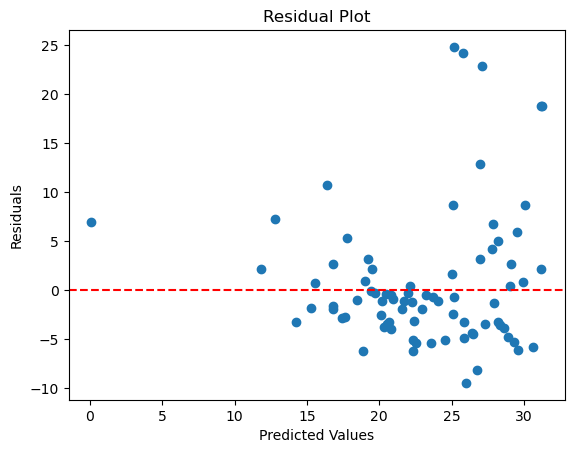

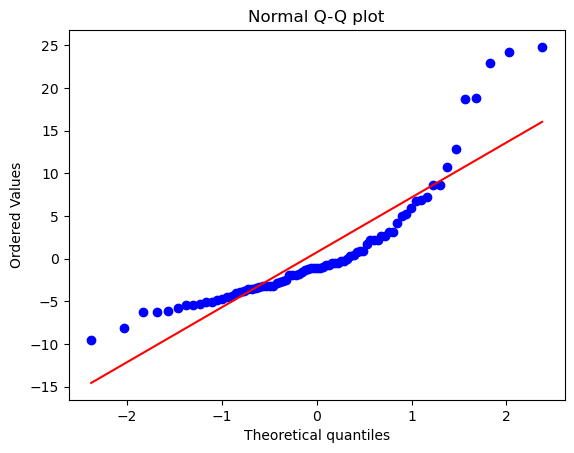

In [61]:
# Plot residuals
plt.scatter(y_pred, residual_ols)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Checking the normality of residuals
stats.probplot(residual_ols.squeeze(), dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

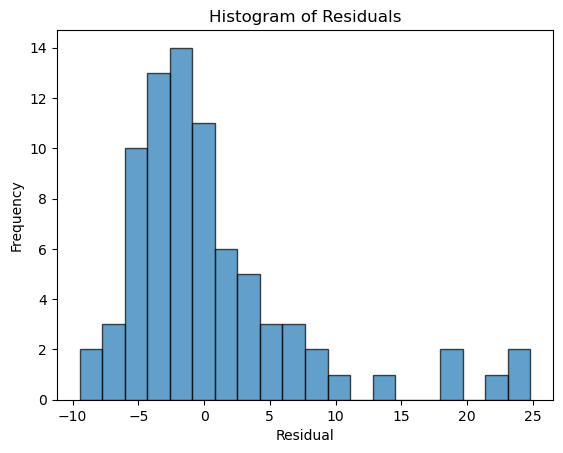

In [104]:
# Create histogram for Normality
plt.hist(residual_ols, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [105]:
# I can see there is a bell curve
# I can also see that it is right-skewed, this means there 

In [62]:
print(model.params)

const    33.879461
LSTAT    -0.913891
dtype: float64


# GLM through normal distribution 

In [90]:
pip install pandas numpy statsmodels scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [172]:
# Define variables
x = pd.DataFrame(df['RM'])
y = pd.DataFrame(df['MEDV'])

# Split the data into training and testing sets (80% train, 20% test)
xtrain, xtest, ytrain, ytest_glm = train_test_split(x, y, test_size=0.2, random_state=42)

In [173]:
# Fit the GLM (Normal distribution) model on training data
normal_model = sm.GLM(ytrain, xtrain, family=sm.families.Gaussian())
normal_results = normal_model.fit()

In [174]:
# Print the summary of the model
print(normal_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   MEDV   No. Observations:                  315
Model:                            GLM   Df Residuals:                      314
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                          55.871
Method:                          IRLS   Log-Likelihood:                -1080.1
Date:                Sat, 20 Jul 2024   Deviance:                       17543.
Time:                        20:32:19   Pearson chi2:                 1.75e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3808
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.5804      0.067     53.648      0.0

In [175]:
# Make predictions on the test data
y_pred_glm = normal_results.predict(xtest)

# Calculate residuals
residual_glm = ytest_glm - y_pred_glm

In [181]:
print(type(ytest), type(y_pred_glm))
print(type(residual_glm))

print("Shape of residual_glm:", residual_glm.shape)
# Print column names
print("Columns in residual_glm:", residual_glm.columns)

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Shape of residual_glm: (79, 80)
Columns in residual_glm: Index([     0,      3,      7,     12,     19,     22,     26,     29,     34,
           37,     39,     46,     50,     55,     56,     65,     66,     67,
           85,     86,     90,     91,     93,     97,     99,    106,    109,
          110,    121,    130,    132,    136,    137,    140,    153,    164,
          170,    174,    175,    180,    187,    195,    198,    204,    209,
          212,    220,    223,    231,    248,    251,    260,    267,    300,
          310,    319,    320,    331,    342,    346,    351,    352,    371,
          372,    413,    414,    428,    446,    447,    454,    459,    470,
          478,    480,    484,    486,    495,    499,    500, 'MEDV'],
      dtype='object')


In [179]:
# Assuming `ytest` is a numpy array and needs to be a Series
if isinstance(ytest, np.ndarray):
    ytest = pd.Series(ytest)

# Convert `residual_glm` to Series if it's a DataFrame
if isinstance(residual_glm, pd.DataFrame):
    residual_glm = residual_glm.squeeze()  # Convert DataFrame to Series
    

# Ensure `y_pred_glm` is a Series
if isinstance(y_pred_glm, np.ndarray):
    y_pred_glm = pd.Series(y_pred_glm)
    
print(type(ytest), type(y_pred_glm))
print(type(residual_glm))

# # Check lengths to ensure they match
# print(f"Length of ytest: {len(ytest)}")
# print(f"Length of y_pred_glm: {len(y_pred_glm)}")
# print(f"Length of residual_glm: {len(residual_glm)}")

# # Plot residuals vs. predicted values
# plt.scatter(y_pred_glm, residual_glm)
# plt.xlabel("Predicted Values")
# plt.ylabel("Residuals")
# plt.title("Residual Plot")
# plt.axhline(y=0, color='r', linestyle='--')
# plt.show()

# # Checking the normality of residuals
# stats.probplot(residual_glm, dist="norm", plot=plt)
# plt.title("Normal Q-Q plot")
# plt.show()

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [157]:
# Ensure ytest and y_pred have the same shape
ytest = ytest.squeeze()
y_pred_glm = y_pred_glm.squeeze()
print(type(ytest), type(y_pred_glm))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [158]:
import math
# Calculate performance metrics
mse_glm = mean_squared_error(ytest_glm, y_pred_glm)
rmse_glm = math.sqrt(mse_glm)
mae_glm = mean_absolute_error(ytest_glm, y_pred_glm)
r2_glm = r2_score(ytest_glm, y_pred_glm)

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse_glm:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_glm:.3f}")
print(f"Mean Absolute Error (MAE): {mae_glm:.3f}")
print(f"R-squared: {r2_glm:.4f}")

Mean Squared Error (MSE): 60.355
Root Mean Squared Error (RMSE): 7.769
Mean Absolute Error (MAE): 5.068
R-squared: 0.2844


In [147]:
residual_glm = residual_glm.squeeze()

In [182]:
# print(ytest.shape())
# print(y_pred_glm.shape())
# print(residual_glm.shape())

ValueError: x and y must be the same size

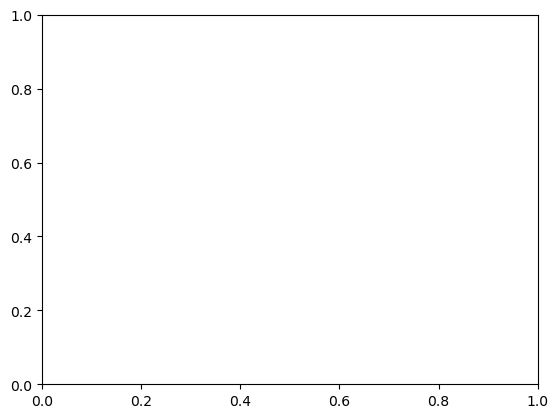

In [183]:
# Plot residuals
plt.scatter(y_pred_glm, residual_glm)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# # Checking the normality of residuals
# stats.probplot(residual_glm.squeeze(), dist="norm", plot=plt)
# plt.title("Normal Q-Q plot")
# plt.show()

C:\Users\varsh\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\varsh\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6764: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

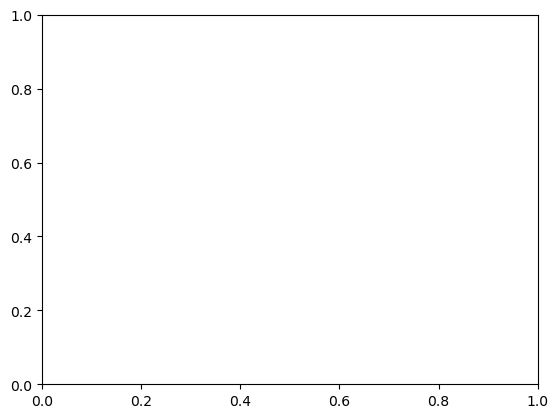

In [135]:
# Create histogram for Normality
plt.hist(residual_glm, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Lets take Multiple features - 

Mean Squared Error (MSE): 31.454
Root Mean Squared Error (RMSE): 5.608
Mean Absolute Error (MAE): 3.368
R-squared: 0.627
Model Efficiency (Percentage Coverage): -64.41%


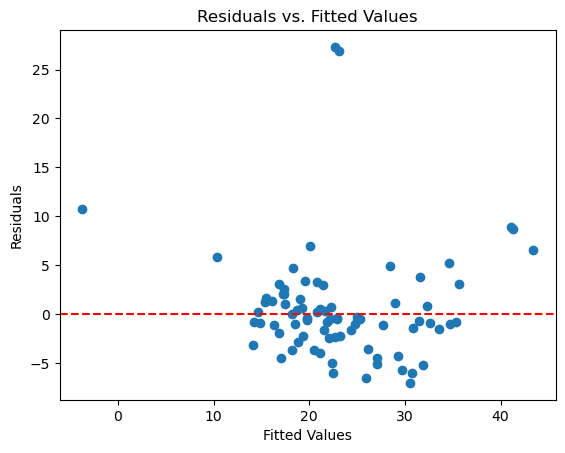

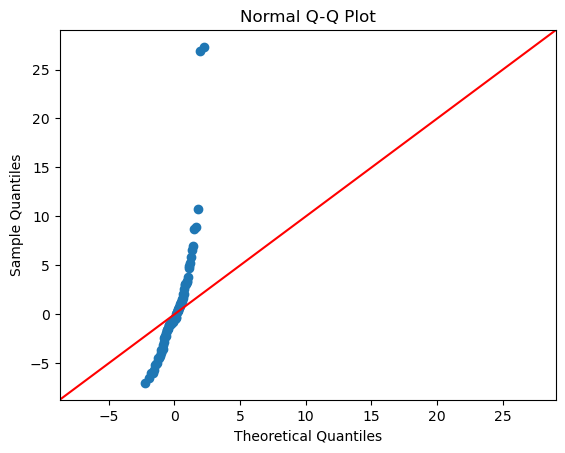

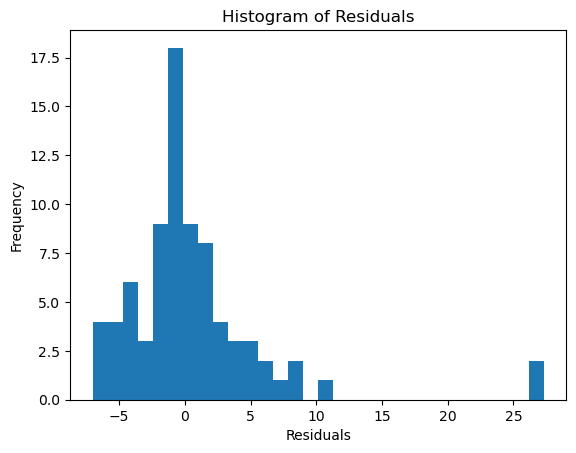

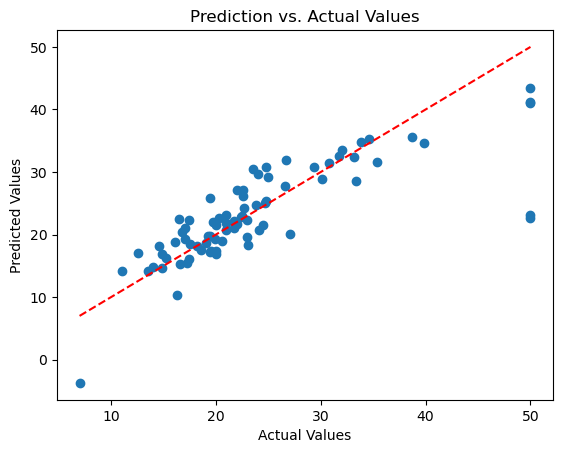

In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


# Split the data into features (X) and target (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the multiple linear regression model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse_multi = mean_squared_error(y_test, y_pred)
rmse_multi = math.sqrt(mse_multi)
mae_multi = mean_absolute_error(y_test, y_pred)
r2_multi = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse_multi:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_multi:.3f}")
print(f"Mean Absolute Error (MAE): {mae_multi:.3f}")
print(f"R-squared: {r2_multi:.3f}")

# Calculate the percentage coverage (R-squared in percentage)
percentage_coverage = r2 * 100
print(f"Model Efficiency (Percentage Coverage): {percentage_coverage:.2f}%")

# Optional: Visualize the results

# Residuals vs. Fitted values plot
residuals_multi = y_test - y_pred
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals_multi)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='dashed')
plt.show()

# Normal Q-Q plot
import statsmodels.api as sm
sm.qqplot(residuals_multi, line='45')
plt.title('Normal Q-Q Plot')
plt.show()

# Histogram of residuals
plt.hist(residuals_multi, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Prediction vs. Actual Values plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs. Actual Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='dashed')
plt.show()
